In [1]:
from lib.unrotated_GT import create_circuit as create_circuit_GT
from lib.unrotated_CAT import create_circuit as create_circuit_cat
from lib.Unrotated_Direct import create_circuit as create_circuit_direct
from lib.Rotated_GT import surface_data as Rotated_GT_DATA
from lib.Rotated_GT import generate_circuit as generate_circuit_Rotated_GT
from lib.Rotated_Direct import surface_data as Rotated_Direct_DATA
from lib.Rotated_Direct import generate_circuit  as  generate_circuit_Rotated_Direct
from lib.Rotated_CAT import surface_data as Rotated_CAT_DATA
from lib.Rotated_CAT import generate_circuit as generate_circuit_Rotated_CAT

def Rotated_GT(n, p1, p2,vertical):
    inv= not vertical
    data = Rotated_GT_DATA(n, 2*n,n, 6, display_svg=False,CAT=True,zigzag=True,inverted=inv)
    circuit = generate_circuit_Rotated_GT(data, p1, p2, rounds=n,CAT=True,zigzag=True, a='sw',b='nw',c='se',d='ne',inverted=inv)
    return circuit

def Rotated_Direct(n, p1, p2,vertical):
    inv= not vertical

    data = Rotated_Direct_DATA(n, 2*n,n, 0, display_svg=False,CAT=True,inverted=inv)
    circuit = generate_circuit_Rotated_Direct(data, p1, p2, rounds=n,CAT=True, a='sw',b='nw',c='se',d='ne',inverted=inv)
    return circuit

def Rotated_CAT(n, p1, p2,vertical):
    inv= not vertical
    data =  Rotated_CAT_DATA(n, 2*n,n, 4, display_svg=False,CAT=True,zigzag=True,inverted=inv)
    circuit = generate_circuit_Rotated_CAT(data, p1, p2, rounds=n,CAT=True,zigzag=True, a='sw',b='nw',c='se',d='ne',inverted=inv)
    return circuit


def Unrotated_Direct(n,p1,p2,vertical):
    circuit = create_circuit_direct(2*n,m= n,cut=2*n,num_rounds=n,p1=p1,p2=p2,vertical=vertical,show_grid=False)
    return circuit

def unrotated_CAT(n,p1,p2,vertical):
   # Create the circuit
    circuit = create_circuit_cat(n=2*n,m=n,cut=2*n,num_rounds=n,p1=p1,p2=p2,vertical=vertical,show_grid=False)
    return circuit

def unrotated_GT(n,p1,p2,vertical):
   # Create the circuit
    circuit = create_circuit_GT(n=2*n,m=n,cut=2*n,num_rounds=n,p1=p1,p2=p2,vertical=vertical,show_grid=True)
    return circuit




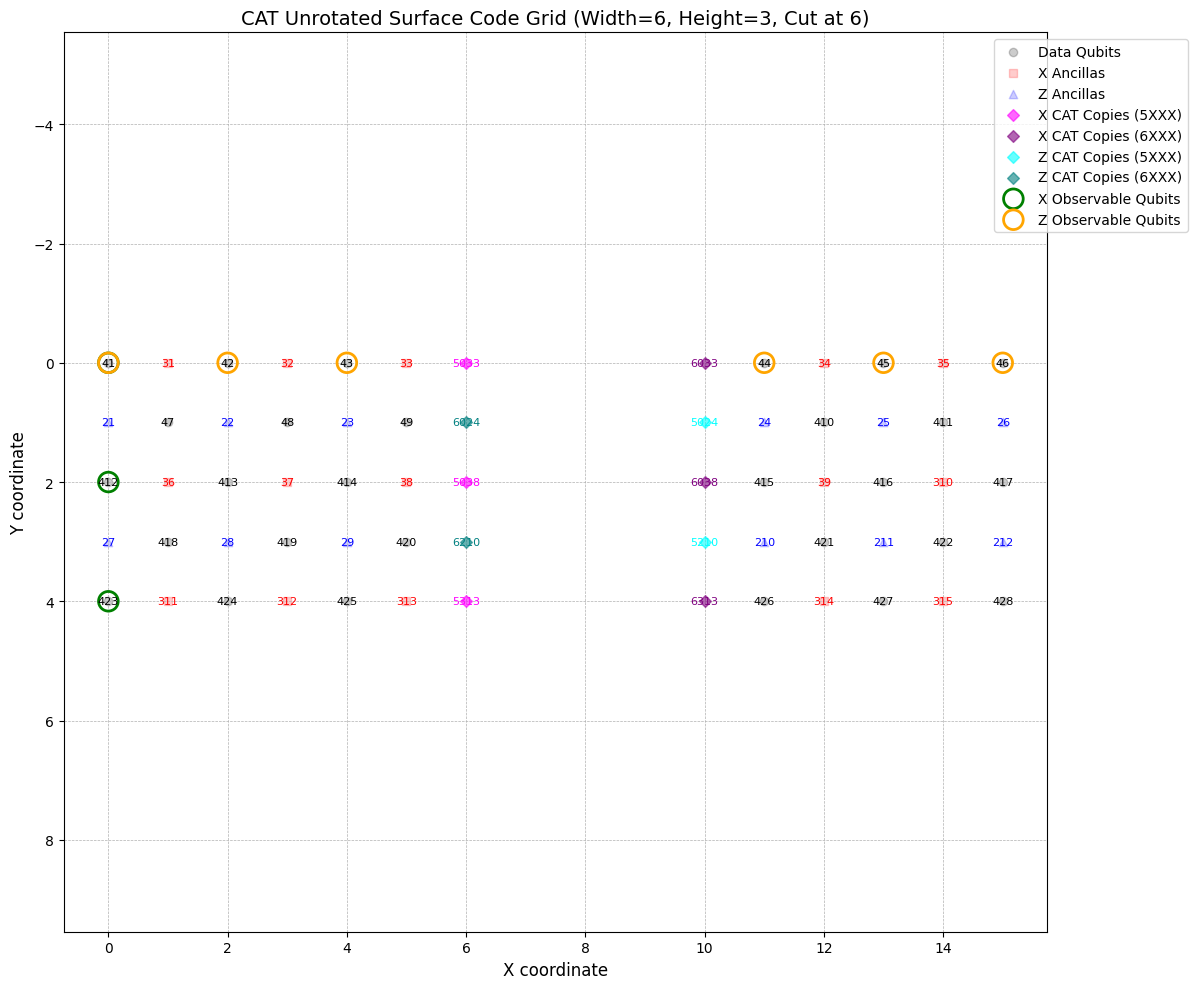

stim.Circuit('''
    QUBIT_COORDS(0, 0) 41
    QUBIT_COORDS(2, 0) 42
    QUBIT_COORDS(4, 0) 43
    QUBIT_COORDS(11, 0) 44
    QUBIT_COORDS(13, 0) 45
    QUBIT_COORDS(15, 0) 46
    QUBIT_COORDS(1, 1) 47
    QUBIT_COORDS(3, 1) 48
    QUBIT_COORDS(5, 1) 49
    QUBIT_COORDS(12, 1) 410
    QUBIT_COORDS(14, 1) 411
    QUBIT_COORDS(0, 2) 412
    QUBIT_COORDS(2, 2) 413
    QUBIT_COORDS(4, 2) 414
    QUBIT_COORDS(11, 2) 415
    QUBIT_COORDS(13, 2) 416
    QUBIT_COORDS(15, 2) 417
    QUBIT_COORDS(1, 3) 418
    QUBIT_COORDS(3, 3) 419
    QUBIT_COORDS(5, 3) 420
    QUBIT_COORDS(12, 3) 421
    QUBIT_COORDS(14, 3) 422
    QUBIT_COORDS(0, 4) 423
    QUBIT_COORDS(2, 4) 424
    QUBIT_COORDS(4, 4) 425
    QUBIT_COORDS(11, 4) 426
    QUBIT_COORDS(13, 4) 427
    QUBIT_COORDS(15, 4) 428
    QUBIT_COORDS(1, 0) 31
    QUBIT_COORDS(3, 0) 32
    QUBIT_COORDS(5, 0) 33
    QUBIT_COORDS(12, 0) 34
    QUBIT_COORDS(14, 0) 35
    QUBIT_COORDS(1, 2) 36
    QUBIT_COORDS(3, 2) 37
    QUBIT_COORDS(5, 2) 38
    QUBIT_COO

In [9]:
unrotated_GT(3,0.01,0.05,False)

### Simulation


In [ ]:
import sinter
import numpy as np
from typing import List, Dict, Callable
import pymatching
import math
import csv

# Define the type for function_name for better type hinting
#FunctionType = Callable[[int, float, float, bool], Any]

def Run_simulation(
    function_name,
    multiplier,
    vertical,
    results_dict: Dict[str, Dict[str, Dict[float, List[List[float]]]]]
) -> None:
    base = 10000   #EDIT when needed 
    pr = np.geomspace(0.002, 0.025, num=15)

    # Iterate over different n values
    n_values = [3, 5,7,9,11]  #edit when needed  
    simulation_results = []
    for n in n_values:
        Q3ubit_code_tasks = [
            sinter.Task(
                circuit=function_name(n, p, multiplier * p, vertical),
                json_metadata={'p': p},
            )
            for p in pr
        ]

        # Sampling
        collected_baconshor_code_stats: List[sinter.TaskStats] = sinter.collect(
            num_workers=9,
            tasks=Q3ubit_code_tasks,
            decoders=['pymatching'],
            max_shots=base * 1000, #Edit when needed
            max_errors=base,
            print_progress=True,
        )

        # Get data (physical error rate=p, logical error rate=l)
        for stats in collected_baconshor_code_stats:
            p = stats.json_metadata['p']
            l = stats.errors / stats.shots if stats.errors != 0 else 0
            simulation_results.append([n, p, l])

    # Determine direction as a string
    direction = 'Vertical' if vertical else 'Horizontal'
    
    # Get the function name as a string
    func_name = function_name.__name__
    
    # Initialize nested dictionaries if keys do not exist
    if func_name not in results_dict:
        results_dict[func_name] = {}
    if direction not in results_dict[func_name]:
        results_dict[func_name][direction] = {}
    if multiplier not in results_dict[func_name][direction]:
        results_dict[func_name][direction][multiplier] = []
    
    # Store the simulation results
    results_dict[func_name][direction][multiplier] = simulation_results

    # Optionally, print a confirmation
    print(f"Stored results for {func_name} | {direction} | Multiplier: {multiplier}")




In [ ]:
import json


results_dict: Dict[str, Dict[str, Dict[float, List[List[float]]]]] = {}
names = [Rotated_Direct,Rotated_CAT,Rotated_GT,Unrotated_Direct,unrotated_CAT,unrotated_GT]
# Run simulations and store results
for name in names:
    for vertical in [True, False]:  # You can add more directions if needed
        for multiplier in [1, 10]:  # You can iterate over more multipliers if needed
            Run_simulation(name, multiplier, vertical, results_dict)
            #CHECKPOINT
        with open('Full-Run.json', 'w') as f:
            json.dump(results_dict, f, indent=4)
# Optionally, save the results to a JSON or CSV file for later use

with open('Full-Run.json', 'w') as f:
    json.dump(results_dict, f, indent=4)

print("All simulation results have been stored successfully.")


Starting 9 workers...
15 cases left:
    pymatching processes=4  ~core_mins_left=89      shots_left=2999700  errors_left=3000    {p=0.002}
    pymatching processes=3  ~core_mins_left=2       shots_left=2978400  errors_left=2997    {p=0.0023954147027895546}
    pymatching processes=2  ~core_mins_left=4       shots_left=2990400  errors_left=2998    {p=0.0028690057991701875}
    pymatching processes=0  ~core_mins_left=19      shots_left=2998500  errors_left=3000    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=9       shots_left=2999500  errors_left=2997    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=266     shots_left=2999900  errors_left=3000    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=266     shots_left=2999900  errors_left=3000    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=266     shots_left=2999900  errors_left=3000    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_

Stored results for unrotated_GT | Vertical | Multiplier: 1


15 cases left:
    pymatching processes=6  ~core_mins_left=1       shots_left=2865600  errors_left=2996    {p=0.002}
    pymatching processes=3  ~core_mins_left=1       shots_left=2947200  errors_left=2996    {p=0.0023954147027895546}
    pymatching processes=0  ~core_mins_left=18      shots_left=2998500  errors_left=2999    {p=0.0028690057991701875}
    pymatching processes=0  ~core_mins_left=86      shots_left=2999700  errors_left=3000    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=54      shots_left=2999500  errors_left=3000    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=250     shots_left=2999900  errors_left=3000    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=258     shots_left=2999900  errors_left=3000    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=250     shots_left=2999900  errors_left=3000    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=25      shots_lef

Stored results for unrotated_GT | Vertical | Multiplier: 10


15 cases left:
    pymatching processes=2  ~core_mins_left=1       shots_left=2918398  errors_left=1292    {p=0.002}
    pymatching processes=1  ~core_mins_left=1       shots_left=2934003  errors_left=1003    {p=0.0023954147027895546}
    pymatching processes=4  ~core_mins_left=1       shots_left=2986500  errors_left=2478    {p=0.0028690057991701875}
    pymatching processes=2  ~core_mins_left=5       shots_left=2999900  errors_left=2994    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=3       shots_left=2999900  errors_left=2991    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2986    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=1       shots_left=2999700  errors_left=2956    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2983    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=2       shots_lef

Stored results for unrotated_GT | Horizontal | Multiplier: 1


14 cases left:
    pymatching processes=1  ~core_mins_left=1       shots_left=2931299  errors_left=852     {p=0.002}
    pymatching processes=4  ~core_mins_left=1       shots_left=2989200  errors_left=2335    {p=0.0028690057991701875}
    pymatching processes=4  ~core_mins_left=1       shots_left=2994600  errors_left=2543    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=1       shots_left=2999700  errors_left=2956    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=3       shots_left=2999900  errors_left=2988    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2979    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2985    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=1       shots_left=2999900  errors_left=2972    {p=0.00846906990048226}
Done collecting
Starting 9 workers...
15 cases left:
    pymatc

Stored results for unrotated_GT | Horizontal | Multiplier: 10


15 cases left:
    pymatching processes=6  ~core_mins_left=1       shots_left=2918400  errors_left=2986    {p=0.002}
    pymatching processes=3  ~core_mins_left=1       shots_left=2945200  errors_left=2985    {p=0.0023954147027895546}
    pymatching processes=0  ~core_mins_left=258     shots_left=2999900  errors_left=3000    {p=0.0028690057991701875}
    pymatching processes=0  ~core_mins_left=266     shots_left=2999900  errors_left=3000    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=26      shots_left=2999700  errors_left=2999    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=258     shots_left=2999900  errors_left=3000    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=13      shots_left=2999900  errors_left=2998    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=9       shots_left=2999900  errors_left=2997    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=13      shots_lef

Stored results for Rotated_GT | Vertical | Multiplier: 1


15 cases left:
    pymatching processes=6  ~core_mins_left=1       shots_left=2932800  errors_left=2986    {p=0.002}
    pymatching processes=3  ~core_mins_left=1       shots_left=2964000  errors_left=2983    {p=0.0023954147027895546}
    pymatching processes=0  ~core_mins_left=52      shots_left=2999500  errors_left=3000    {p=0.0028690057991701875}
    pymatching processes=0  ~core_mins_left=86      shots_left=2999700  errors_left=3000    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=26      shots_left=2999900  errors_left=2999    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=258     shots_left=2999900  errors_left=3000    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=26      shots_left=2999900  errors_left=2999    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=26      shots_left=2999900  errors_left=2999    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=27      shots_lef

Stored results for Rotated_GT | Vertical | Multiplier: 10


15 cases left:
    pymatching processes=2  ~core_mins_left=1       shots_left=2910204  errors_left=1433    {p=0.002}
    pymatching processes=1  ~core_mins_left=1       shots_left=2910157  errors_left=883     {p=0.0023954147027895546}
    pymatching processes=3  ~core_mins_left=1       shots_left=2973000  errors_left=2099    {p=0.0028690057991701875}
    pymatching processes=3  ~core_mins_left=1       shots_left=2998200  errors_left=2915    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=1       shots_left=2999700  errors_left=2971    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=3       shots_left=2999900  errors_left=2991    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2985    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=3       shots_left=2999900  errors_left=2988    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=2       shots_lef

Stored results for Rotated_GT | Horizontal | Multiplier: 1


15 cases left:
    pymatching processes=2  ~core_mins_left=1       shots_left=2939708  errors_left=1299    {p=0.002}
    pymatching processes=1  ~core_mins_left=1       shots_left=2956800  errors_left=1370    {p=0.0023954147027895546}
    pymatching processes=4  ~core_mins_left=1       shots_left=2989200  errors_left=2431    {p=0.0028690057991701875}
    pymatching processes=2  ~core_mins_left=1       shots_left=2998900  errors_left=2931    {p=0.0034362293368603814}
    pymatching processes=0  ~core_mins_left=6       shots_left=2999900  errors_left=2995    {p=0.004115597137836079}
    pymatching processes=0  ~core_mins_left=4       shots_left=2999900  errors_left=2992    {p=0.00492928094736558}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2983    {p=0.005903836027749967}
    pymatching processes=0  ~core_mins_left=2       shots_left=2999900  errors_left=2983    {p=0.0070710678118654745}
    pymatching processes=0  ~core_mins_left=1       shots_lef

Stored results for Rotated_GT | Horizontal | Multiplier: 10
All simulation results have been stored successfully.
